<a href="https://colab.research.google.com/github/Leonascimento85/-mvp_salarios/blob/main/MVP_P%C3%B3s_Ci%C3%AAncia_de_Dados_PUC_RIO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP de Análise de Dados e Boas Práticas

Aluna: Leonardo Ferreira do Nascimento

1 - Definição do problema:
**negrito**
Conjunto de dados com 11 colunas com os dados de Cientista de Dados

Objetivo é Análisar o Crescimento das carreiras
Faixa salarial

Para mais detalhes sobre este dataset, consulte:https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

**Informações sobre os atributos**

A seguir os atributos em cada dataset e sua descrição:

work_year: O ano em que o salário foi pago.

experience_level: O nível de experiência no trabalho durante o ano

employment_type: o tipo de emprego para a função

job_title: A função em que trabalhou durante o ano.

salary: O valor bruto total do salário pago.

salary_currency: A moeda do salário pago como um código de moeda ISO 4217.

salary_in_usd: O salário em USD

employee_residence: o país de residência principal do funcionário durante o ano de trabalho como um código de país ISO 3166.

remote_ratio: A quantidade total de trabalho feito remotamente

company_location: O país da sede do empregador ou filial contratante

company_size: O número médio de pessoas que trabalharam para a empresa durante o ano

2 - Importações de Bibliotecas, Carga e Análise de Dados

In [1]:
# Importação de bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

# configuração ignorar os warnings
import warnings
warnings.filterwarnings("ignore")

In [62]:
# Carga de Dados
url = 'https://raw.githubusercontent.com/Leonascimento85/-mvp_salarios/main/ds_salaries.csv'
df_salarios = pd.read_csv(url)
df_salarios.head(10) #exibir as 10 primeiras linhas

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [63]:
# Exibe as dez últimas linhas do dataset
df_salarios.tail(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3745,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
3748,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


A visualização preliminar indica que há colunas que não serão necessarias,e nelas existenm valores faltantes. Com isso iremos eliminar algumas colunas que não farão parte do nosso estudo.

In [64]:
# Resume as informações do dataset
print(df_salarios.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


In [65]:
df_salarios.shape

(3755, 11)

In [66]:
#resumo estatístico das informações disponíveis em cada atributo com números reais
df_salarios.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Podemos analisar que na linha count, que não há dados faltantes. Também há indícios de que não há ausência de informações, ao notar que não há valores mínimos iguais ou inferior a zero.

In [69]:
df_salarios.groupby('salary_in_usd').size()

salary_in_usd
5132      1
5409      2
5679      1
5707      1
5723      1
         ..
416000    1
423000    1
423834    1
430967    1
450000    1
Length: 1035, dtype: int64

In [71]:
df_salarios.corr(method = 'pearson')

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.094724,0.228290,-0.236430
salary,-0.094724,1.000000,-0.023676,0.028731
salary_in_usd,0.228290,-0.023676,1.000000,-0.064171
remote_ratio,-0.236430,0.028731,-0.064171,1.000000


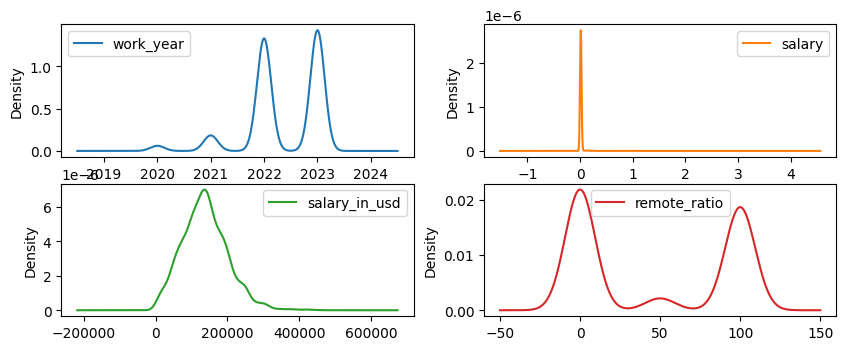

In [75]:
df_salarios.plot(kind = 'density', subplots = True, sharex = False, layout = (5,2), figsize = (10,10))
plt.show()

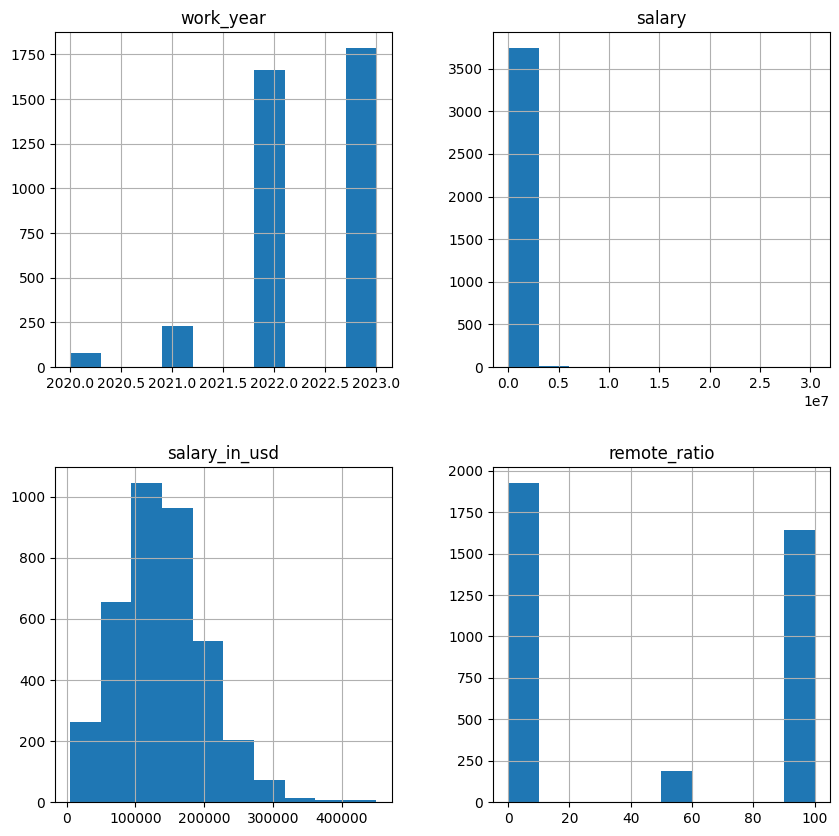

In [74]:
#Criar histograma para cada atributo do dataset, para verificarmos como está a distribuição dos dados.
df_salarios.hist(figsize = (10,10))
plt.show()

<Axes: title={'center': 'Experience level and Salary'}, xlabel='experience_level', ylabel='salary_in_usd'>

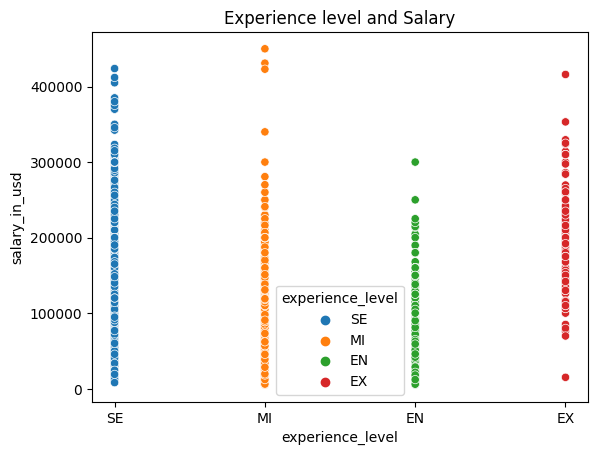

In [90]:
plt.title("Experience level and Salary") 

sns.scatterplot(x=df_salarios['experience_level'],y=df_salarios['salary_in_usd'],hue=df_salarios['experience_level'])

Podemos ver que SE (Senior) tem uma quantidade de maior salário.

Rankeamento das 10 melhores carreiras em 2023

In [79]:
top_10=df_salarios['job_title'].value_counts()[:10].rename_axis('job_title').reset_index(name='count')
top_10.style.background_gradient(cmap='Blues')

,job_title,count
0,Data Engineer,1040
1,Data Scientist,840
2,Data Analyst,612
3,Machine Learning Engineer,289
4,Analytics Engineer,103
5,Data Architect,101
6,Research Scientist,82
7,Data Science Manager,58
8,Applied Scientist,58
9,Research Engineer,37


Comparar o Nivel de Experiência com faixa Salarial



<Axes: title={'center': 'Top 10 jobs in 2023'}, xlabel='job_title', ylabel='count'>

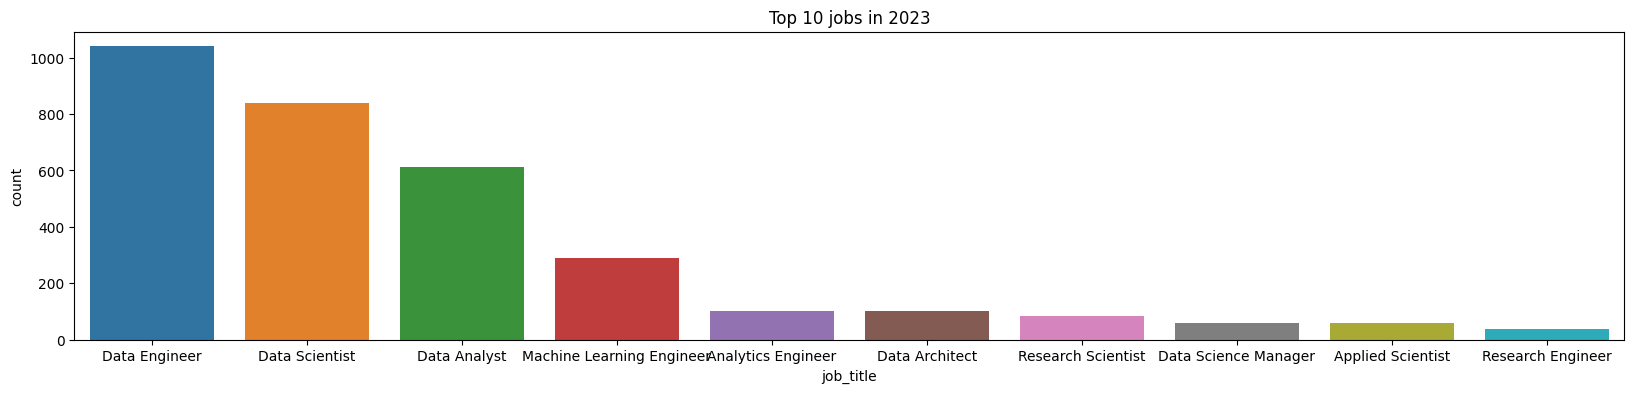

In [80]:
plt.figure(figsize=(20,4))   
plt.title("Top 10 jobs in 2023")   

sns.barplot(x=top_10['job_title'], y=top_10['count'])

Podemos ver que a carreira de Data Engineer obteve melhor destaque em 2023

<Axes: title={'center': 'Average Data Science Salaries by year'}, xlabel='Year', ylabel='salary_in_usd'>

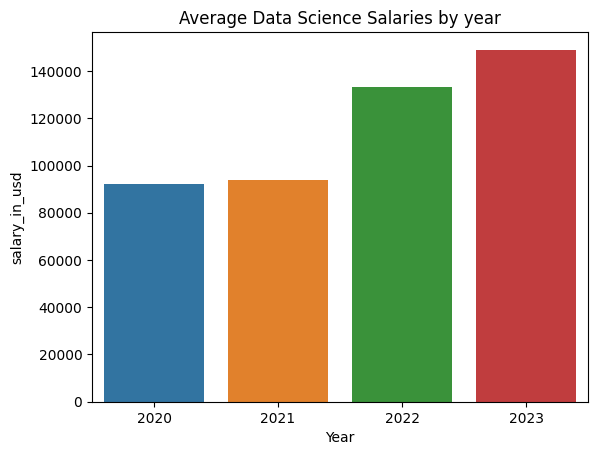

In [94]:
avg_yearly_salary = df_salarios['salary_in_usd'].groupby(df_salarios['work_year']).mean()

plt.xlabel('Year')
plt.ylabel('Mean Salary')
plt.title("Average Data Science Salaries by year")
sns.barplot(x=['2020', '2021', '2022', '2023'], y=avg_yearly_salary)

Podemos Analisar o Crescimento do Salario do Cientista de Dados ao longo dos Anos

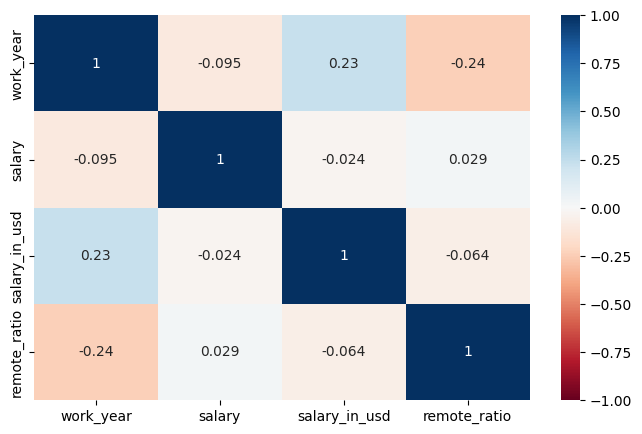

In [97]:
  plt.figure(figsize = (8,5))
  sns.heatmap(df_salarios.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

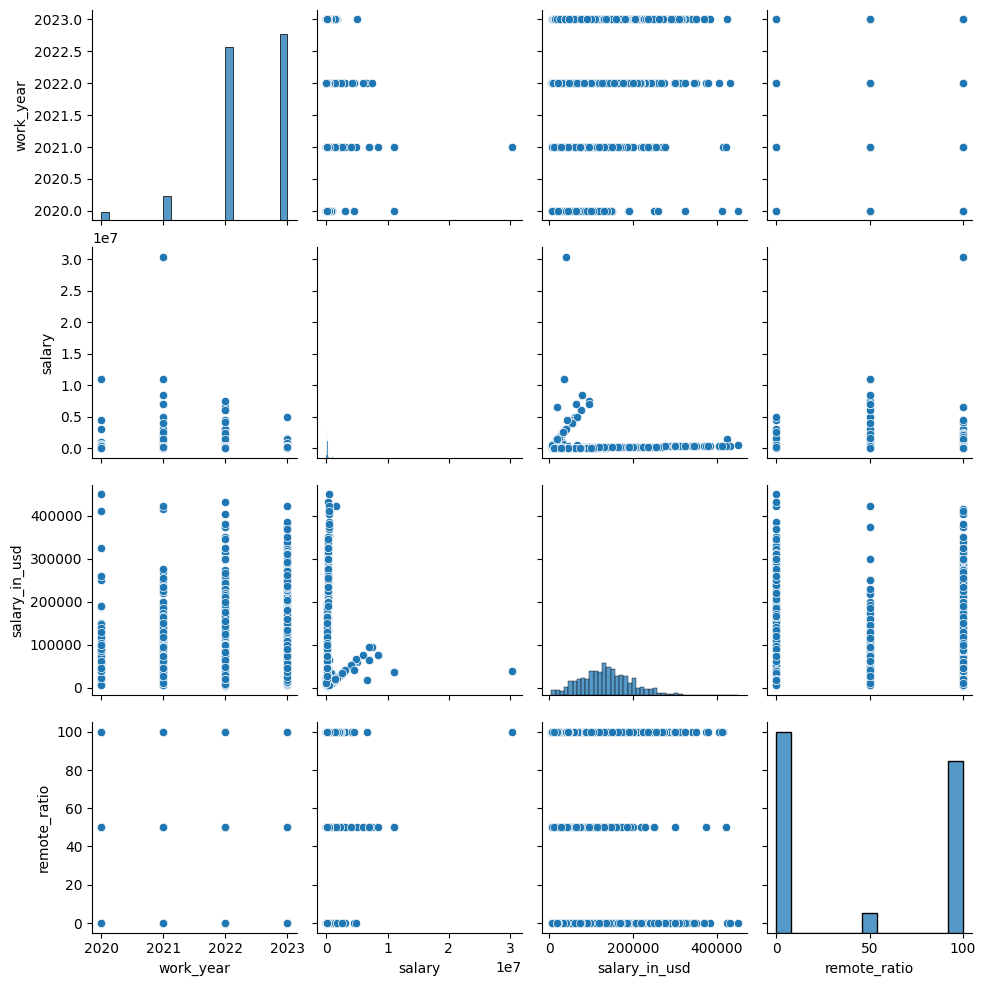

In [96]:
sns.pairplot(df_salarios, height = 2.5);

In [98]:
df_salarios.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Como na análise de dados não encontramos nenhum valor igual ou inferior a 0, é possível afirmar que não há informações ausentes no dataset. O mesmo é comprovado ao exibir a visualização matricial da nulidade do dataset.

<Axes: >

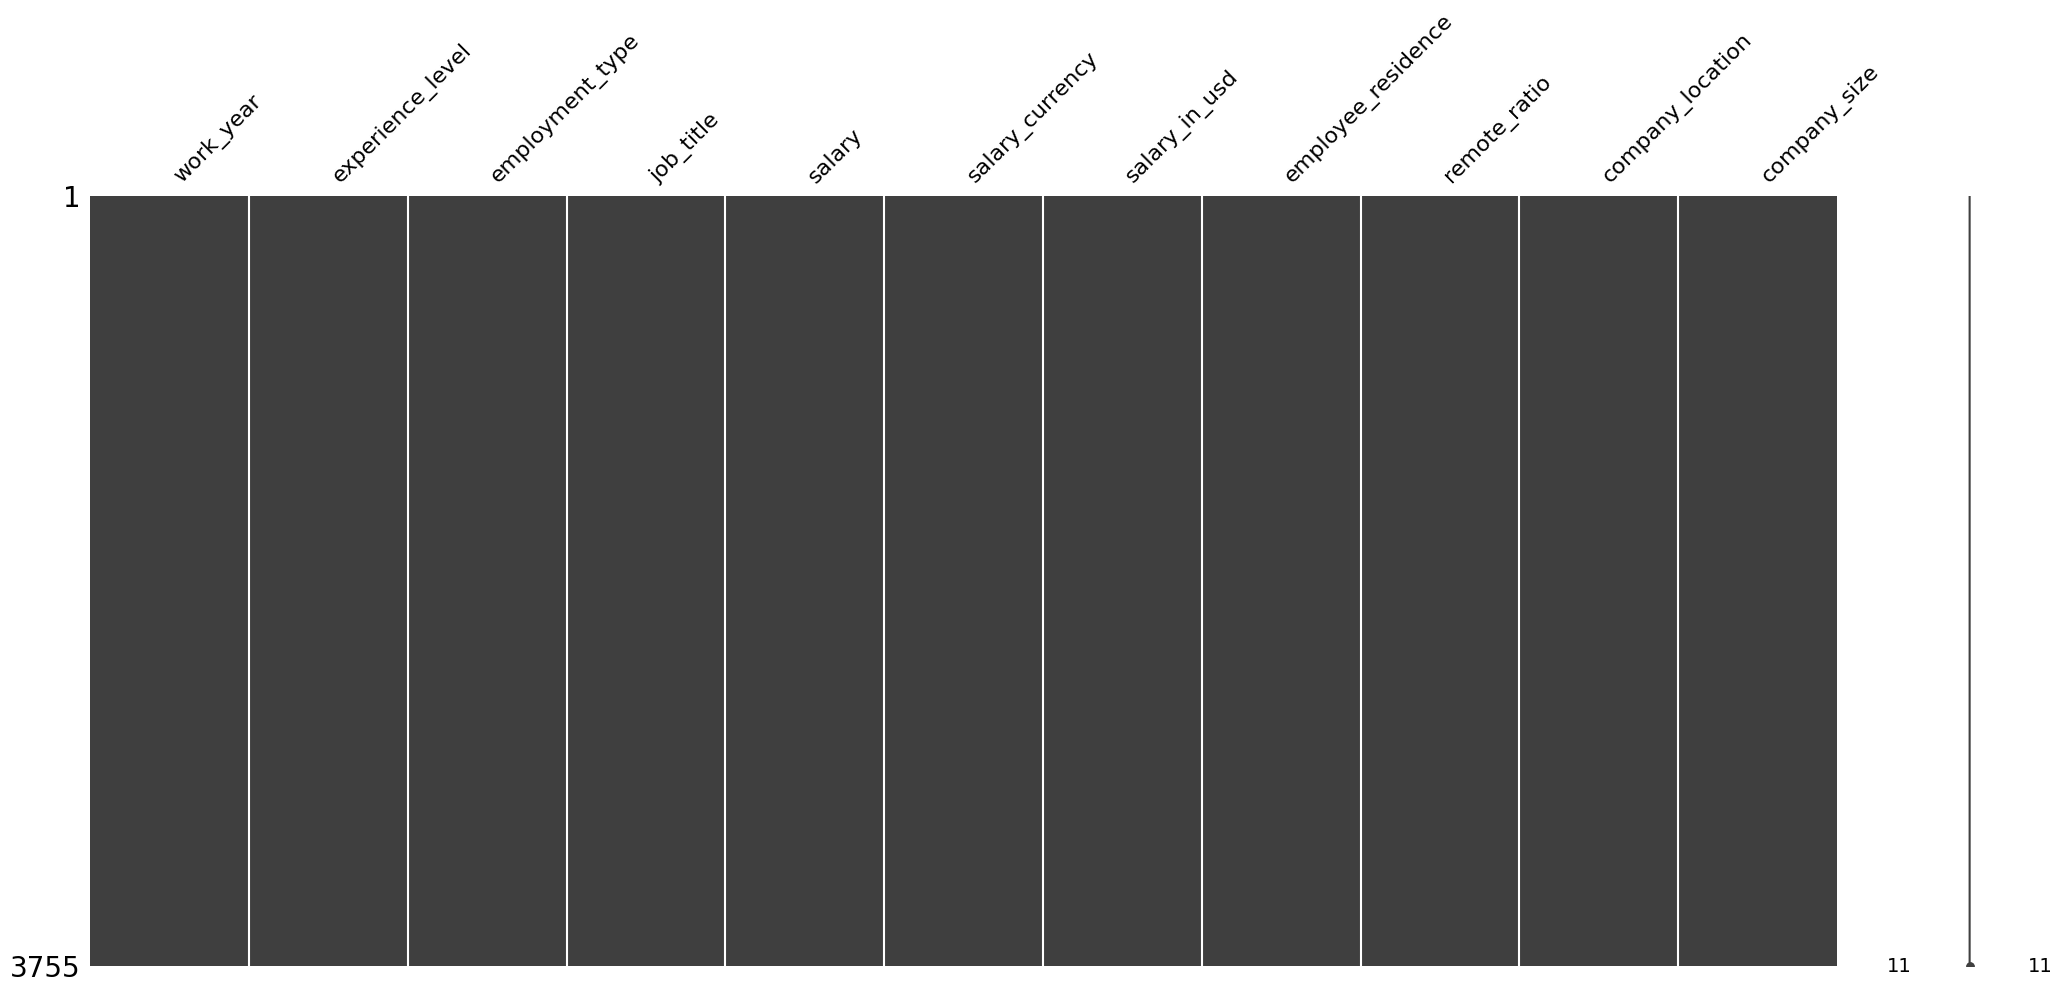

In [99]:
ms.matrix(df_salarios)

In [102]:
array = df_salarios.values
X = array[:,0:9]
y = array[:,9]